### 練習問題 (A)

In [7]:
import numpy as np

class Algo_trivial:

    '''
    An iterator which does nothing special at all, but makes
    a trivial update to the initial parameters given, and
    keeps record of the number of iterations made.
    '''

    def __init__(self, w_init, t_max):
        
        self.w = np.copy(w_init)
        self.t_max = t_max


    def __iter__(self):

        self.t = 0
        print("(__iter__): t =", self.t)

        return self
    

    def __next__(self):

        # Condition for stopping.
        
        if self.t >= self.t_max:
            print("--- Condition reached! ---")
            raise StopIteration

        self.w *= 2
        self.t += 1
        print("(__next__): t =", self.t, " w =", self.w)
        
        # Note that __next__ does not need to return anything.

    def __str__(self):

        out = "State of w:" + "\n" + "  " + str(self.w)
        return out


#### A-1, A-2, A-3

In [9]:
al = Algo_trivial(w_init=np.array([0,1,2,3,4]), t_max=4)

for mystep in al:
    print(al)

(__iter__): t = 0
(__next__): t = 1  w = [0 2 4 6 8]
State of w:
  [0 2 4 6 8]
(__next__): t = 2  w = [ 0  4  8 12 16]
State of w:
  [ 0  4  8 12 16]
(__next__): t = 3  w = [ 0  8 16 24 32]
State of w:
  [ 0  8 16 24 32]
(__next__): t = 4  w = [ 0 16 32 48 64]
State of w:
  [ 0 16 32 48 64]
--- Condition reached! ---


#### A-4

In [10]:
al = Algo_trivial(w_init=np.array([0,1,2,3,4]), t_max=4)

for mystep in al:
    print(al)
    
for mystep in al:
    print(al)

(__iter__): t = 0
(__next__): t = 1  w = [  0  32  64  96 128]
State of w:
  [  0  32  64  96 128]
(__next__): t = 2  w = [  0  64 128 192 256]
State of w:
  [  0  64 128 192 256]
(__next__): t = 3  w = [  0 128 256 384 512]
State of w:
  [  0 128 256 384 512]
(__next__): t = 4  w = [   0  256  512  768 1024]
State of w:
  [   0  256  512  768 1024]
--- Condition reached! ---


##### 解答
__init__を通らないので値が初期化されないまま学習が進んでいく

### 練習問題B

In [27]:
def alpha_fixed(t, val):
    '''
    Step-size function: constant.
    '''
    return val

def alpha_log(t, val=1):
    '''
    Step-size function: logarithmic.
    '''
    return val / (1+math.log((1+t)))

def alpha_pow(t, val=1, pow=0.5):
    '''
    Step-size function: polynomial.
    '''
    return val / (1 + t**pow)


# A function for making step-size functions.
def make_step(u):
    def mystep(t):
        return alpha_fixed(t=t, val=u)
    return mystep

In [28]:
class Algo_GD_FiniteDiff:

    '''
    Iterator which implements a line-search steepest descent method,
    via finite differences to approximate the gradient.
    '''

    def __init__(self, w_init, t_max, step, delta, verbose, store):

        # Store the user-supplied information.
        self.w = np.copy(w_init)
        self.t = None
        self.t_max = t_max
        self.step = step
        self.delmtx = np.eye(self.w.size) * delta # 微分するときの差分
        self.delta = delta
        self.verbose = verbose
        self.store = store
        
        # If asked to store, keep record of all updates.
        if self.store:
            self.wstore = np.zeros((self.w.size,t_max+1), dtype=np.float64)
            self.wstore[:,0] = self.w.flatten()
        else:
            self.wstore = None
        

    def __iter__(self):

        self.t = 0

        if self.verbose:
            print("(via __iter__)")
            self.print_state()
        
        return self

    
    def __next__(self):

        # Condition for stopping.
        if self.t >= self.t_max:
            if self.verbose:
                print("--- Condition reached! ---")
            raise StopIteration

        self.t += 1

        if self.verbose:
            print("(via __next__)")
            self.print_state()


    def update(self, model):
        
        # 更新する重みの係数
        stepsize = self.step(self.t)
        newdir = np.zeros(self.w.size, dtype=self.w.dtype)
        loss = model.l_tr(self.w)

        # Perturb one coordinate at a time, compute finite difference.
        for j in range(self.w.size):
            
            # Perturb one coordinate. MODEL ACCESS here.
            # デルタだけ動かしたときの値を計算する
            delj = np.take(self.delmtx,[j],axis=1)
            loss_delta = model.l_tr((self.w + delj))
            
            # 勾配が入る
            newdir[j] = np.mean(loss_delta-loss) / self.delta
            
        # 重みの更新
        self.w = self.w - stepsize * newdir.reshape(self.w.shape)
        
        if self.store:
            self.wstore[:,self.t] = self.w.flatten()


    def print_state(self):
        print("------------")
        print("t =", self.t, "( max = ", self.t_max, ")")
        print("w = ", self.w)
        print("------------")


#### B-1

一度に全てを更新するとデルタが全ての次元に加算されるので$w+\Delta_{j}$を計算できず、$\widehat{g}_{i,j}(w)$が求めれないため。

#### B-2

非線形な要素がない偏微分が可能な関数であれば`FiniteDiff`を使うことができた。

#### B-3

差分法によりある点での$w_{(t)}$に関する微分係数$\nabla l(w_{(t)};z_{i})$を近似している。  
`delta`が大きくなるほど精度は荒くなる。

### 練習問題(C)

#### C-1

初期状態`w_init`をより悪くすると、収束が遅くなる。

初期状態`w_init`をよりよくすると基本的に収束が早くなるが、ステップサイズが大きすぎる場合は解の周辺で振動することになる。

### 練習問題 (D)

#### D-2

Error: 3.25816157535
Error: 3.16154542804
Error: 3.54050181751
Error: 3.44232400716
Error: 3.51908264562
Error: 3.42558684032
Error: 3.21276016785
Error: 3.4563990203
The results are:
mean:  3.37704518777
std:  0.135725082329


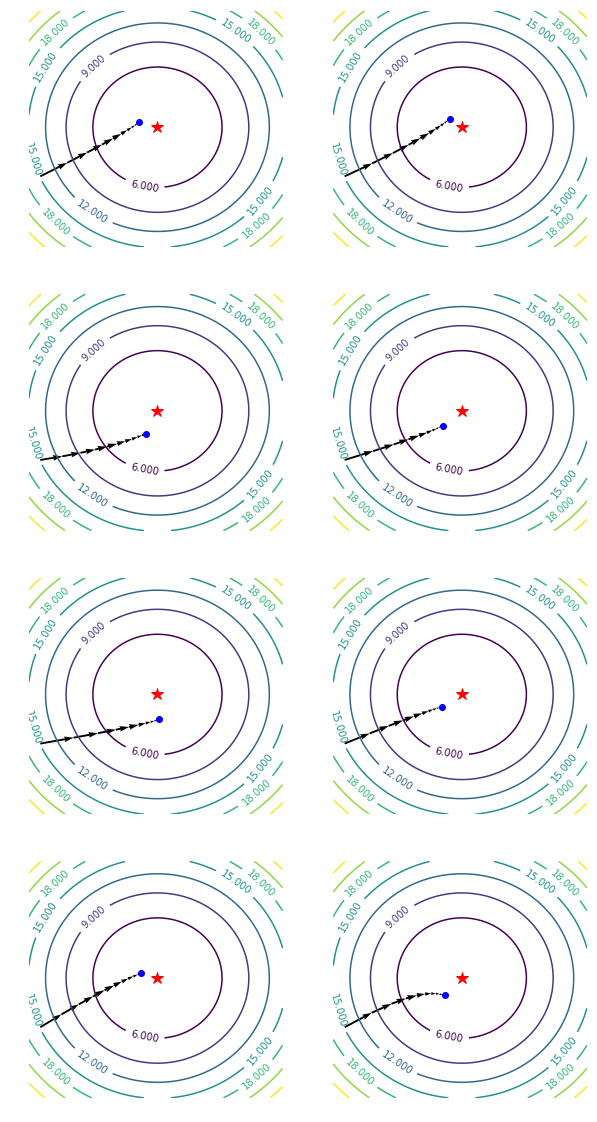

In [37]:
import support.parse_data as dp
import support.parse_model as mp
import pprint as pp

w_init = np.array([0,0], dtype=np.float64).reshape((2,1))

num_trials = 8

w_est_overtrials = {str(i):None for i in range(num_trials)} # initialize

perf_list = []
for tr in range(num_trials):
    
    # Generate new data.
    data_info = dp.NoisyOpt_isoBig()
    mod = mp.model(data_info)
    
    # "Run" the algorithm.
    al = Algo_GD_FiniteDiff(w_init=w_init,\
                            delta=0.01,\
                            step=make_step(0.2),\
                            t_max=10,\
                            verbose=False,\
                            store=True)
    for mystep in al:
        al.update(model=mod)
        
    perf = mod.eval(al.w)
    perf_list.append(perf)
    print("Error:", perf)
    
    # Store the algorithm's output (the full trajectory).
    w_est_overtrials[str(tr)] = al.wstore

print('The results are:')
print('mean: ', np.array(perf_list).mean())
print('std: ', np.array(perf_list).std())

eval2D = np.vectorize(mod.eval2D_helper)
tmpdel = np.linalg.norm(mod.w_true-w_init) * 1
xvals = np.arange(mod.w_true[0]-tmpdel,mod.w_true[0]+tmpdel, 0.1)
yvals = np.arange(mod.w_true[1]-tmpdel,mod.w_true[1]+tmpdel, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = eval2D(w1=X, w2=Y)
    
myfig = plt.figure(figsize=(10,20))

grididx = 1
for tr in range(num_trials):
    
    mypath = w_est_overtrials[str(tr)]
    
    ax = myfig.add_subplot(num_trials//2, 2, grididx)
    grididx += 1
    
    CS = ax.contour(X, Y, Z)
    ax.quiver(mypath[0,:-1], mypath[1,:-1],
              mypath[0,1:]-mypath[0,:-1],
              mypath[1,1:]-mypath[1,:-1],
              scale_units='xy', angles='xy', scale=1, color='k')
    CS.clabel(inline=1, fontsize=10)
    ax.plot(*mod.w_true, 'r*', markersize=12)
    ax.plot(*mypath[:,-1], 'bo', markersize=6)
    ax.axis("off")

plt.show()

### 練習問題 (E)

#### E-1

In [24]:
import matplotlib
import matplotlib.pyplot as plt

class Algo_GD(Algo_GD_FiniteDiff):

    '''
    Iterator which implements a line-search steepest descent method,
    using the sample mean estimate of the gradient.
    '''

    def __init__(self, w_init, t_max, step, verbose, store):
        
        super(Algo_GD,self).__init__(w_init=w_init, t_max=t_max, step=step,
                                     delta=0, verbose=verbose, store=store)


    def update(self, model):
        
        stepsize = self.step(self.t)
        
        # Instead of finite-difference approximation, simply
        # access the gradient method of our model object.
        newdir = np.mean(model.g_tr(w=self.w),
                         axis=0) # take sample mean to get update direction.
        
        self.w = self.w - stepsize * newdir.reshape(self.w.shape)
        
        if self.store:
            self.wstore[:,self.t] = self.w.flatten()

Error: 3.66399272599
Error: 4.21315497537
Error: 3.55125746385
Error: 3.72389178183
Error: 3.27418424451
Error: 3.28127913233
Error: 3.12960398497
Error: 3.02578703424
The results are:
mean:  3.48289391789
std:  0.361731990655


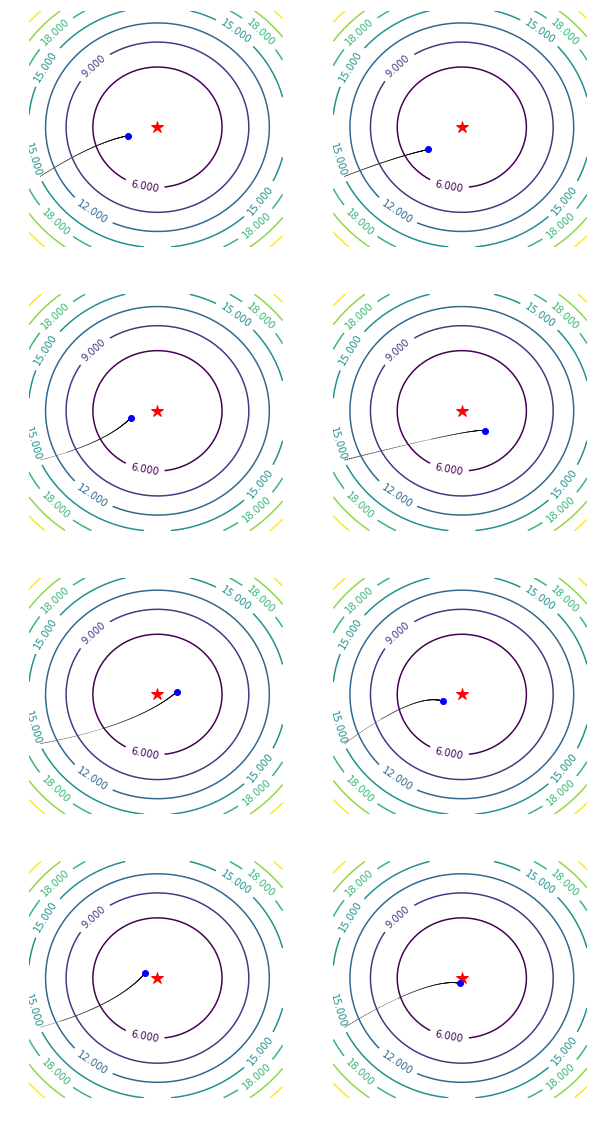

In [53]:
import support.parse_data as dp
import support.parse_model as mp
import pprint as pp

w_init = np.array([0,0], dtype=np.float64).reshape((2,1))

num_trials = 8

w_est_overtrials = {str(i):None for i in range(num_trials)} # initialize

perf_list = []

for tr in range(num_trials):
    
    # Generate new data.
    data_info = dp.NoisyOpt_isoBig()
    mod = mp.model(data_info)
    
    # "Run" the algorithm.
    al = Algo_GD(w_init=w_init,\
                 step=make_step(0.2),\
                 t_max=10,\
                 verbose=False,\
                 store=True)
    for mystep in al:
        al.update(model=mod)
        
    perf = mod.eval(al.w)
    perf_list.append(perf)
    print("Error:", perf)
    
    # Store the algorithm's output (the full trajectory).
    w_est_overtrials[str(tr)] = al.wstore

print('The results are:')
print('mean: ', np.array(perf_list).mean())
print('std: ', np.array(perf_list).std())

eval2D = np.vectorize(mod.eval2D_helper)
tmpdel = np.linalg.norm(mod.w_true-w_init) * 1
xvals = np.arange(mod.w_true[0]-tmpdel,mod.w_true[0]+tmpdel, 0.1)
yvals = np.arange(mod.w_true[1]-tmpdel,mod.w_true[1]+tmpdel, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = eval2D(w1=X, w2=Y)
    
myfig = plt.figure(figsize=(10,20))

grididx = 1
for tr in range(num_trials):
    
    mypath = w_est_overtrials[str(tr)]
    
    ax = myfig.add_subplot(num_trials//2, 2, grididx)
    grididx += 1
    
    CS = ax.contour(X, Y, Z)
    ax.quiver(mypath[0,:-1], mypath[1,:-1],
              mypath[0,1:]-mypath[0,:-1],
              mypath[1,1:]-mypath[1,:-1],
              scale_units='xy', angles='xy', scale=1, color='k')
    CS.clabel(inline=1, fontsize=10)
    ax.plot(*mod.w_true, 'r*', markersize=12)
    ax.plot(*mypath[:,-1], 'bo', markersize=6)
    ax.axis("off")

plt.show()

### 練習問題(F)

In [39]:
class Algo_SGD(Algo_GD_FiniteDiff):

    '''
    Iterator which implements a line-search steepest descent method,
    using the sample mean estimate of the gradient.
    '''

    def __init__(self, w_init, batchsize, t_max, step, delta, verbose, store):
        
        super(Algo_SGD,self).__init__(w_init=w_init, t_max=t_max, step=step,
                                      delta=delta, verbose=verbose, store=store)
        
        self.batchsize = batchsize


    def update(self, model):
        
        stepsize = self.step(self.t)
        
        # Instead of using the "full gradient" averaged over the
        # whole batch, use a randomly selected sub-sample.
        # 効率的な計算はしていない
        fullgrad = model.g_tr(w=self.w)
        shufidx = np.random.choice(model.n, size=self.batchsize, replace=False)
        minigrad = np.take(fullgrad,shufidx,axis=0)
        
        newdir = np.mean(minigrad,
                         axis=0) # take sample mean to get update direction.
            
        self.w = self.w - stepsize * newdir.reshape(self.w.shape)
        
        if self.store:
            self.wstore[:,self.t] = self.w.flatten()
        

Error: 3.65256949729
Error: 3.16077278408
Error: 3.16085066029
Error: 3.1974067415
Error: 3.75361836745
Error: 3.27089943506
Error: 3.14212788427
Error: 3.46973113425
The results are:
mean:  3.35099706302
std:  0.227244501867


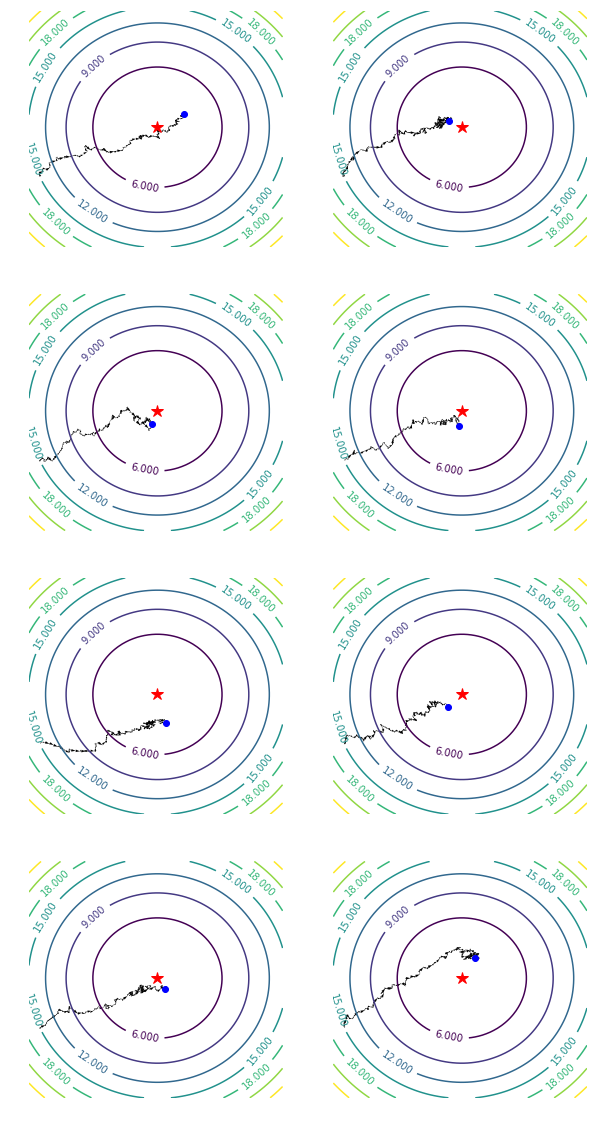

In [52]:

import support.parse_data as dp
import support.parse_model as mp
import pprint as pp

w_init = np.array([0,0], dtype=np.float64).reshape((2,1))

num_trials = 8

w_est_overtrials = {str(i):None for i in range(num_trials)} # initialize

perf_list = []

for tr in range(num_trials):
    
    # Generate new data.
    data_info = dp.NoisyOpt_isoBig()
    mod = mp.model(data_info)
    
    # "Run" the algorithm.
    al = Algo_SGD(w_init=w_init,\
                  batchsize=1,
                  delta=0.01,\
                  step=make_step(0.01),\
                  t_max=300,\
                  verbose=False,\
                  store=True)
    for mystep in al:
        al.update(model=mod)
        
    perf = mod.eval(al.w)
    perf = mod.eval(al.w)
    perf_list.append(perf)
    print("Error:", perf)
    
    # Store the algorithm's output (the full trajectory).
    w_est_overtrials[str(tr)] = al.wstore

print('The results are:')
print('mean: ', np.array(perf_list).mean())
print('std: ', np.array(perf_list).std())

eval2D = np.vectorize(mod.eval2D_helper)
tmpdel = np.linalg.norm(mod.w_true-w_init) * 1
xvals = np.arange(mod.w_true[0]-tmpdel,mod.w_true[0]+tmpdel, 0.1)
yvals = np.arange(mod.w_true[1]-tmpdel,mod.w_true[1]+tmpdel, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = eval2D(w1=X, w2=Y)
    
myfig = plt.figure(figsize=(10,20))

grididx = 1
for tr in range(num_trials):
    
    mypath = w_est_overtrials[str(tr)]
    
    ax = myfig.add_subplot(num_trials//2, 2, grididx)
    grididx += 1
    
    CS = ax.contour(X, Y, Z)
    ax.quiver(mypath[0,:-1], mypath[1,:-1],
              mypath[0,1:]-mypath[0,:-1],
              mypath[1,1:]-mypath[1,:-1],
              scale_units='xy', angles='xy', scale=1, color='k')
    CS.clabel(inline=1, fontsize=10)
    ax.plot(*mod.w_true, 'r*', markersize=12)
    ax.plot(*mypath[:,-1], 'bo', markersize=6)
    ax.axis("off")

plt.show()

#### F-2

t_maxを大きくし、ステップサイズを小さくすると奇跡が安定し、解へ収束していく。

#### F-3

##### step: 0.2, t_max: 10
* SGD 
mean:  5.25452661914, std:  2.84676440632
* GD
mean:  3.37704518777, std:  0.135725082329

##### step: 0.01, t_max: 300
* SGD
mean:  3.35099706302, std:  0.227244501867   
* GD
mean:  3.48289391789, std:  0.361731990655

ステップが大きく反復回数が小さいと平均・分散共にSGDの方が大きくなるが、
ステップを小さく反復回数が大きいとSGDの方が成績が良くなる。